# chapter 7. Clustering

## K-Means Algorithm

**K-Means**는 **군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트를 선택하는 군집화 기법**이다. <br>
군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다. <br>

In [ ]:
class sklearn.cluster.KMeans(n_clusters = 3, 
                             init = 'k-means++', 
                             max_iter = 300,
                             tol = 0.0001,
                             precomput_distances = 'auto',
                             verboes = 0, 
                             random_state = None,
                            copy_x = True, 
                            n_jobs = 1,
                            algorithm = 'auto')

KMeans 클래스는 다음과 같은 초기화 파라미터를 가지고 있다. <br>
KMeans 초기화 파라피터 중 가장 중요한 파라미터는 **n_cluster**이며, 군집화할 갯수, 즉 군집 중심점의 갯수를 의미한다. <br>
init은 초기에 군집 중심점의 좌표를 설정할 방식을 말한다. <br>
max_iter는 최대 반복 횟수이며, **이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.** <br>

KMeans 객체는 군집화 수행이 완료되면 **군집화와 관련된 주요 속성**을 알 수 있다. <br>
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표, 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있다. 

### K-Means를 이용한 붓꽃 데이터셋 군집화

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print('target name:', iris.target_names)

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**KMeans 객체를 생성하고 군집화 수행**

- labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인
- fit_predict(), fit_transform() 수행 결과 확인

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)

# fit()을 수행해 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환된다. 
kmeans.fit(irisDF)

/Users/1001l1000/opt/anaconda3/envs/J/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [5]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
kmeans.fit_predict(irisDF)

/Users/1001l1000/opt/anaconda3/envs/J/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [7]:
kmeans.fit_transform(irisDF)

/Users/1001l1000/opt/anaconda3/envs/J/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

**군집화 결과를 irisDF에 'cluster' 컬럼으로 추가하고 target 값과 결과 비교**

In [8]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [9]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


In [10]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_

iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소** <br>

붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에서 적합하지 않아 PCA를 이용해 4개의 속성을 2개로 차원축소한 뒤, X좌표, Y좌표로 개별 데이터를 표현하도록 한다. 

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


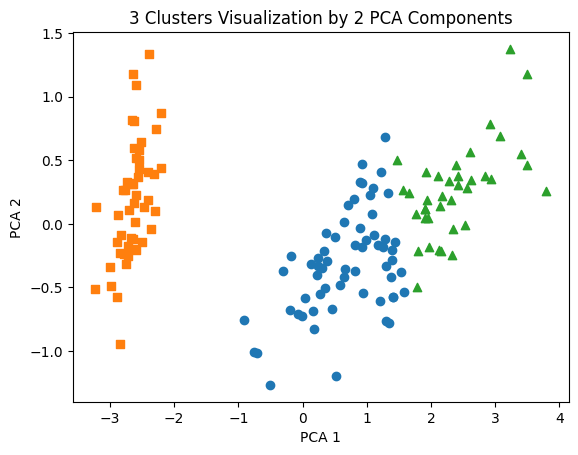

In [12]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x = irisDF.loc[marker0_ind,'pca_x'], y = irisDF.loc[marker0_ind,'pca_y'], marker = 'o') 
plt.scatter(x = irisDF.loc[marker1_ind,'pca_x'], y = irisDF.loc[marker1_ind,'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind,'pca_x'], y = irisDF.loc[marker2_ind,'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 군집화 알고리즘 테스트를 위한 데이터 생성

대표적인 **군집화용 데이터 생성기**로는 **make_blobs()와 make_classification() API**가 있다. <br>
make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있으며, make_classification()은 노이즈를 포함한 데이터를 만드는데 유용하게 사용할 수 있다.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- n_samples : 생성할 총 데이터의 수, defualt = 100개

- n_features : 데이터의 피처 수, 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현한다.

- centers : int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타낸다. 
    그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미

- cluster_std: 생성될 군집 데이터의 표준 편차를 의미, 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어진다.
    [0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만든다.
    군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용

In [14]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(10)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
5,-0.908302,1.970778,2
6,2.472119,0.437033,1
7,1.656842,2.441289,1
8,1.077800,4.625379,0
9,-1.679427,2.602003,2


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

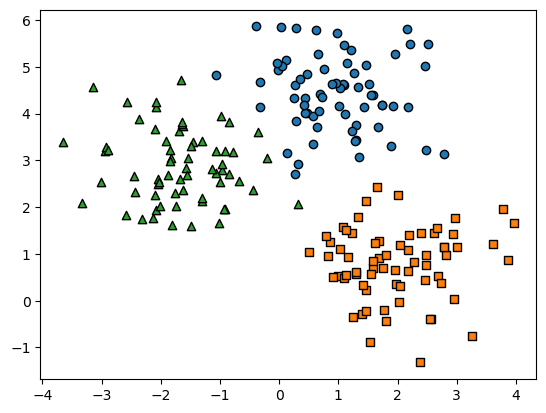

In [10]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers = ['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])
plt.show()

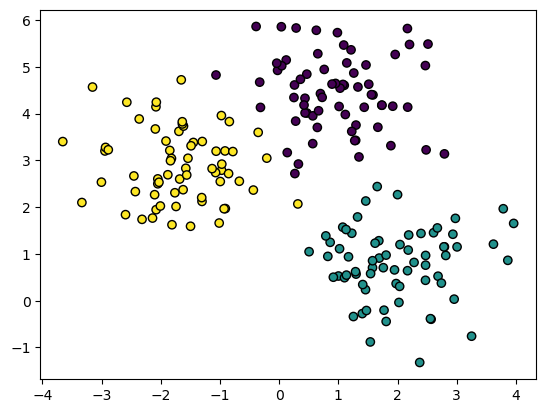

In [11]:
target_list = np.unique(y)
plt.scatter(x = clusterDF['ftr1'], y = clusterDF['ftr2'], edgecolor = 'k', c = y )

In [12]:
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

In [15]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

/Users/1001l1000/opt/anaconda3/envs/J/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


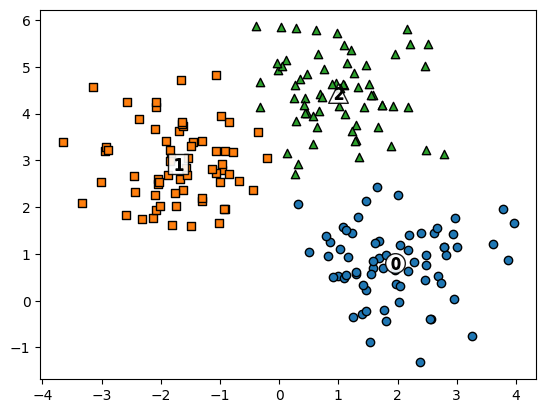

In [16]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', 
                marker = markers[label] )
    
    center_x_y = centers[label]
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color='white',
                alpha=0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', 
                marker = '$%d$' % label)

plt.show()

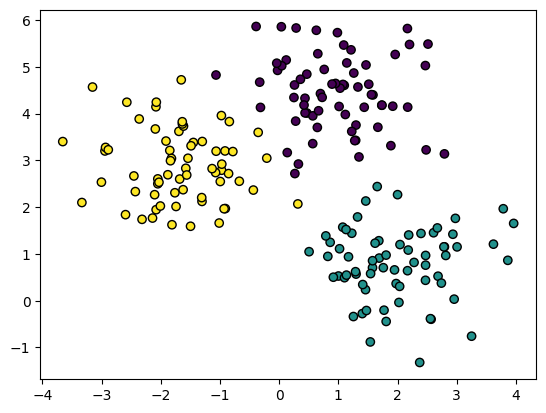

In [17]:
target_list = np.unique(y)
plt.scatter(x = clusterDF['ftr1'], y = clusterDF['ftr2'], edgecolor = 'k', c = y )

In [18]:
kmeans.cluster_centers_

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

In [19]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64
